# Network Analysis 

In [3]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Preparing the Data before networkx

This section will be commented out because it relies on large csv files that I used to create the files I use for analysis. Refer to the ReadMe file and the comments in the below code for more details.

In [155]:
# df = pd.read_csv('cast.csv')
# df.head()
# df.shape

In [139]:
# roi = pd.read_csv('df_roi.csv')
# roi.head()

In [156]:
# cast = df[df['movie_id'].isin(set(roi['movie_id']))]
# cast.head()
# cast.shape 
# # now you are working with a df of 120k rows instead of 560k

In [140]:
# cast.head() # clean the cast df and then when its cleaned up, save to new csv file

In [141]:
# cast['0'].value_counts # can drop this column

In [142]:
# cast.drop(['Unnamed: 0','0','credit_id'], axis=1, inplace=True)
# cast.head()

In [143]:
# cast['gender'].value_counts() # Need to figure out how to deal with the gender varible that is non-binary


In [144]:
# cast[cast['gender']==0]

# looks like 2.0 are male actors, 
# 1.0 are female actors, 
# and 0.0 are both? 
# Is it a problem to just filter out the 0.0 actors?

In [145]:
# cast_network = cast[['movie_id', 'gender', 'name']]
# cast_network

In [146]:
# how many movies am I dealing with?
# len(set(cast_network['movie_id']))

In [147]:
# how many actors?
# len(set(cast_network['name']))

# 61k actors will probably be too many to visualize in a digestable format. 
# start by filtering to top 100 men and top 100 women

In [148]:
# top200 = cast_network.pivot_table(values='movie_id', index='name', aggfunc='count').sort_values('movie_id', ascending=False).head(200)
# top200.reset_index(inplace=True)

# top200 # need to set the index, otherwise it will have 'name' as the index, not as a column of names. 

In [149]:
# now filter the cast_network to include only actors in the top_200 df:

# cast_top200 = cast_network[cast_network['name'].isin(top200['name'])]
# # cast_top200[cast_top200['gender']!=2.0] # curious to see the top women/other.
# cast_top200

In [133]:
# cast_top200.to_csv('cast_top200.csv')

### Now start the Network Analysis:

In [151]:
cast_top200 = pd.read_csv('cast_top200.csv')
cast_top200.drop(['Unnamed: 0'], axis=1, inplace=True)
cast_top200

,movie_id,gender,name
0,862,2.0,Tom Hanks
1,862,2.0,John Ratzenberger
2,8844,2.0,Robin Williams
3,8844,1.0,Kirsten Dunst
4,949,2.0,Al Pacino
...,...,...,...
6258,335988,2.0,Steve Buscemi
6259,335988,2.0,Frank Welker
6260,353491,2.0,Idris Elba
6261,353491,2.0,Matthew McConaughey


In [152]:
# test = cast_top200.drop(columns=['gender'])
test

,movie_id,name
0,862,Tom Hanks
5,862,John Ratzenberger
13,8844,Robin Williams
15,8844,Kirsten Dunst
68,949,Al Pacino
...,...,...
559594,335988,Steve Buscemi
559596,335988,Frank Welker
561100,353491,Idris Elba
561101,353491,Matthew McConaughey


In [153]:
sample = test.sample(50)

# working with 50 is quicker and easier than working with 6263 actors, especially for the visualization. 

In [154]:
test_lists = test.groupby('movie_id')['name'].apply(list).to_dict()
test_lists

# iterate through df, to put actors into the movie_id lists.

# output as dictionary. How to iterate through lists in dictionaries. 
# Thought: Is it earier to do it all straight from the dataframe?
# would it make more sense to MELT the df (opposite of explode) back on the movie_id to then have a list of multiple actors? 

{5: ['Antonio Banderas', 'Bruce Willis'],
 11: ['Harrison Ford', 'James Earl Jones'],
 12: ['Willem Dafoe', 'Allison Janney', 'Stephen Root', 'John Ratzenberger'],
 13: ['Tom Hanks'],
 14: ['Kevin Spacey', 'Chris Cooper', 'Allison Janney'],
 16: ['Peter Stormare', 'Stellan Skarsgård'],
 18: ['Bruce Willis', 'Gary Oldman'],
 22: ['Johnny Depp'],
 25: ['Chris Cooper'],
 28: ['Robert Duvall',
  'Laurence Fishburne',
  'Harrison Ford',
  'Dennis Hopper',
  'Charlie Sheen'],
 33: ['Clint Eastwood', 'Gene Hackman', 'Morgan Freeman', 'Philip Ettington'],
 35: ['Tom Hanks'],
 38: ['Jim Carrey',
  'Kate Winslet',
  'Kirsten Dunst',
  'Mark Ruffalo',
  'Tom Wilkinson'],
 58: ['Johnny Depp', 'Stellan Skarsgård', 'Bill Nighy', 'Philip Ettington'],
 59: ['Ed Harris'],
 63: ['Bruce Willis', 'Brad Pitt', 'Christopher Plummer'],
 65: ['Michael Shannon', 'Anthony Mackie'],
 66: ['Clint Eastwood', 'Gene Hackman', 'Ed Harris', 'Richard Jenkins'],
 69: ['Robert Patrick'],
 70: ['Clint Eastwood', 'Morgan F

In [23]:
from itertools import combinations

In [23]:
lst = ['Tom Cruise', 'Brad Pitt', 'Vince Vaughn']

In [24]:
for combo in combinations(lst, 2):  # 2 for pairs, 3 for triplets, etc
    print(combo)

('Tom Cruise', 'Brad Pitt')
('Tom Cruise', 'Vince Vaughn')
('Brad Pitt', 'Vince Vaughn')


### Try to graph a test network with the movie_id: actors dictionary. (Remember this is only a sample of 50 of the top200 actors)

In [24]:
tuples_as_edges = []
for i in test_lists.values():
    for x in combinations(i, 2):
        x = tuple(sorted(x))  # here you want the sorted tuples to later account for duplicates and reverse duplicates!
        tuples_as_edges.append(x)
tuples_as_edges

edges = list(set(tuples_as_edges))
edges

[('Harry Dean Stanton', 'Robert Duvall'),
 ('Peter Stormare', 'William H. Macy'),
 ('Philip Baker Hall', 'Tom Wilkinson'),
 ('Jon Favreau', 'Justin Long'),
 ('Gwyneth Paltrow', 'Stellan Skarsgård'),
 ('Bruce Greenwood', 'Denzel Washington'),
 ('Robin Williams', 'Stellan Skarsgård'),
 ('Colin Farrell', 'Jude Law'),
 ('Forest Whitaker', 'John Cusack'),
 ('Aaron Eckhart', 'Cameron Diaz'),
 ('Jim Broadbent', 'Meryl Streep'),
 ('Bradley Cooper', 'Jennifer Aniston'),
 ('John Goodman', 'Ray Liotta'),
 ('Edward Norton', 'Tom Wilkinson'),
 ('Alan Arkin', 'Michael Caine'),
 ('Gary Oldman', 'Robert Duvall'),
 ('Jason Bateman', 'Jon Favreau'),
 ('Cameron Diaz', 'Queen Latifah'),
 ('Dennis Hopper', 'Jeffrey Wright'),
 ('Paul Giamatti', 'Stan Lee'),
 ('Owen Wilson', 'Pierce Brosnan'),
 ('Bruce McGill', 'Jeffrey Wright'),
 ('Liam Neeson', 'Sandra Bullock'),
 ('Samuel L. Jackson', 'Steve Zahn'),
 ('Dustin Hoffman', 'Susan Sarandon'),
 ('Edward Norton', 'Philip Ettington'),
 ('John Hurt', 'Liam Neeson'

In [25]:
# Take the first and second elements from each of these tuples and add them as an edge in the network

element1 = [i[0] for i in edges]
element2 = [i[1] for i in edges]

In [26]:
G_symmetric = nx.Graph()

In [27]:
for e in element1:
    for f in element2:
        G_symmetric.add_edge(e, f)

In [ ]:
# nx.info?

In [28]:
print(nx.info(G_symmetric))

# The average degree doesn't make much sense here.
# the max number of edges is 40,000 (200x200)

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 20079
Average degree: 200.7900


In [158]:
# G_symmetric.nodes()

In [159]:
# G_symmetric.edges()

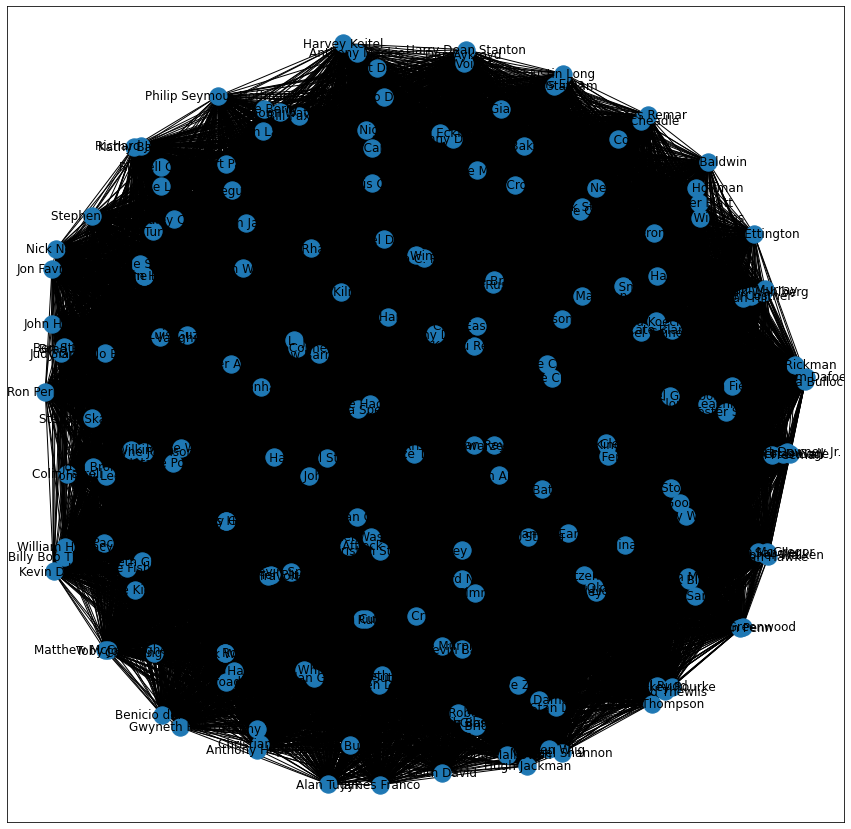

In [29]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(G_symmetric)

### Instead of dropping duplicated tuples, include ONLY duplicates in the network. This means fewer, but stronger connections between nodes.

In [33]:
dup_tuples_as_edges = []
for i in test_lists.values():
    for x in combinations(i, 2):
        x = tuple(sorted(x))
        dup_tuples_as_edges.append(x)
dup_tuples_as_edges


# now include ONLY duplicates! And include in network ONLY if they appear in 
# AT LEAST 5 movies together.
dup_edges = list(set([e for e in dup_tuples_as_edges if dup_tuples_as_edges.count(e) > 5]))
len(dup_edges)

30

In [34]:
elementx = [i[0] for i in dup_edges]
elementy = [i[1] for i in dup_edges]

G_symm_dup = nx.Graph()

for e in elementx:
    for f in elementy:
        G_symm_dup.add_edge(e, f)

In [35]:
print(nx.info(G_symm_dup))

Name: 
Type: Graph
Number of nodes: 35
Number of edges: 419
Average degree:  23.9429


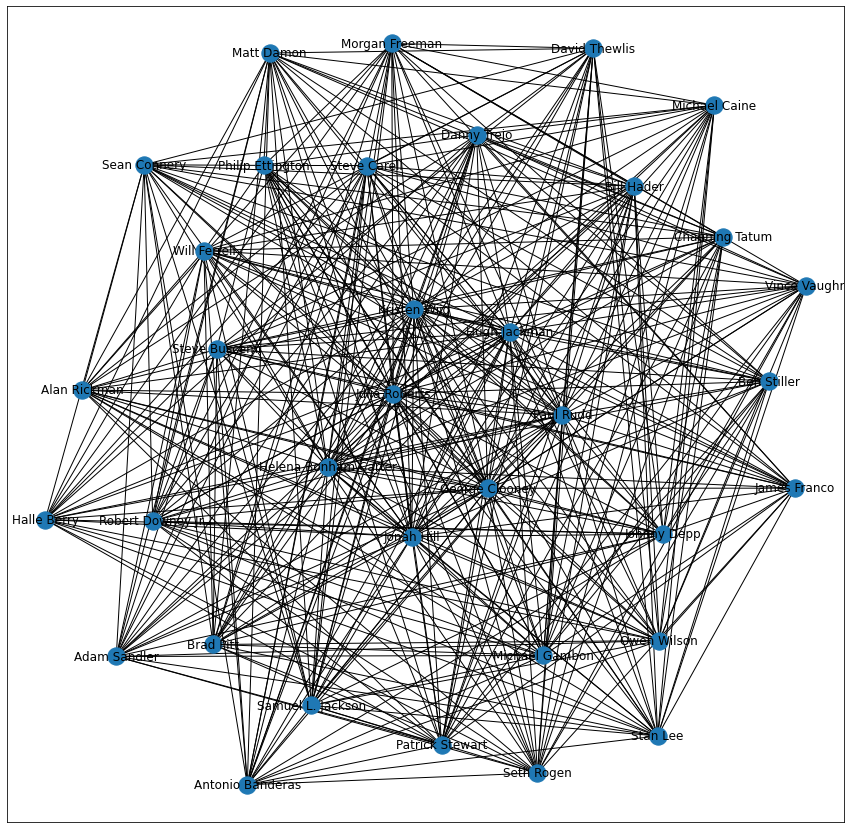

In [36]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(G_symm_dup)

# Remember, this is a network of actors who appear in at least 5 movies together. 

In [37]:
A = nx.adjacency_matrix(G_symm_dup)
print(A)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (1, 0)	1
  (1, 4)	1
  (1, 6)	1
  (1, 8)	1
  (1, 9)	1
  :	:
  (33, 16)	1
  (33, 17)	1
  (33, 18)	1
  (33, 19)	1
  (33, 20)	1
  (34, 1)	1
  (34, 2)	1
  (34, 3)	1
  (34, 4)	1
  (34, 5)	1
  (34, 6)	1
  (34, 7)	1
  (34, 8)	1
  (34, 9)	1
  (34, 10)	1
  (34, 11)	1
  (34, 12)	1
  (34, 13)	1
  (34, 14)	1
  (34, 15)	1
  (34, 16)	1
  (34, 17)	1
  (34, 18)	1
  (34, 19)	1
  (34, 20)	1


In [38]:
G_symm_dup.nodes()
# somehow compare these nodes to the cast_top200 actors to sort by gender and add node coloring?

NodeView(('Michael Caine', 'Morgan Freeman', 'Seth Rogen', 'Matt Damon', 'Helena Bonham Carter', 'Owen Wilson', 'Paul Rudd', 'Will Ferrell', 'Jonah Hill', 'Julia Roberts', 'Kristen Wiig', 'Steve Buscemi', 'Stan Lee', 'George Clooney', 'Sean Connery', 'Michael Gambon', 'Steve Carell', 'Johnny Depp', 'Danny Trejo', 'Patrick Stewart', 'Hugh Jackman', 'Brad Pitt', 'Alan Rickman', 'Bill Hader', 'James Franco', 'Ben Stiller', 'Vince Vaughn', 'Channing Tatum', 'Adam Sandler', 'Samuel L. Jackson', 'Robert Downey Jr.', 'Philip Ettington', 'David Thewlis', 'Antonio Banderas', 'Halle Berry'))

In [39]:
genders = [np.mean(cast_top200['gender'][cast_top200['name']==item]) for item in G_symm_dup.nodes()]
# genders

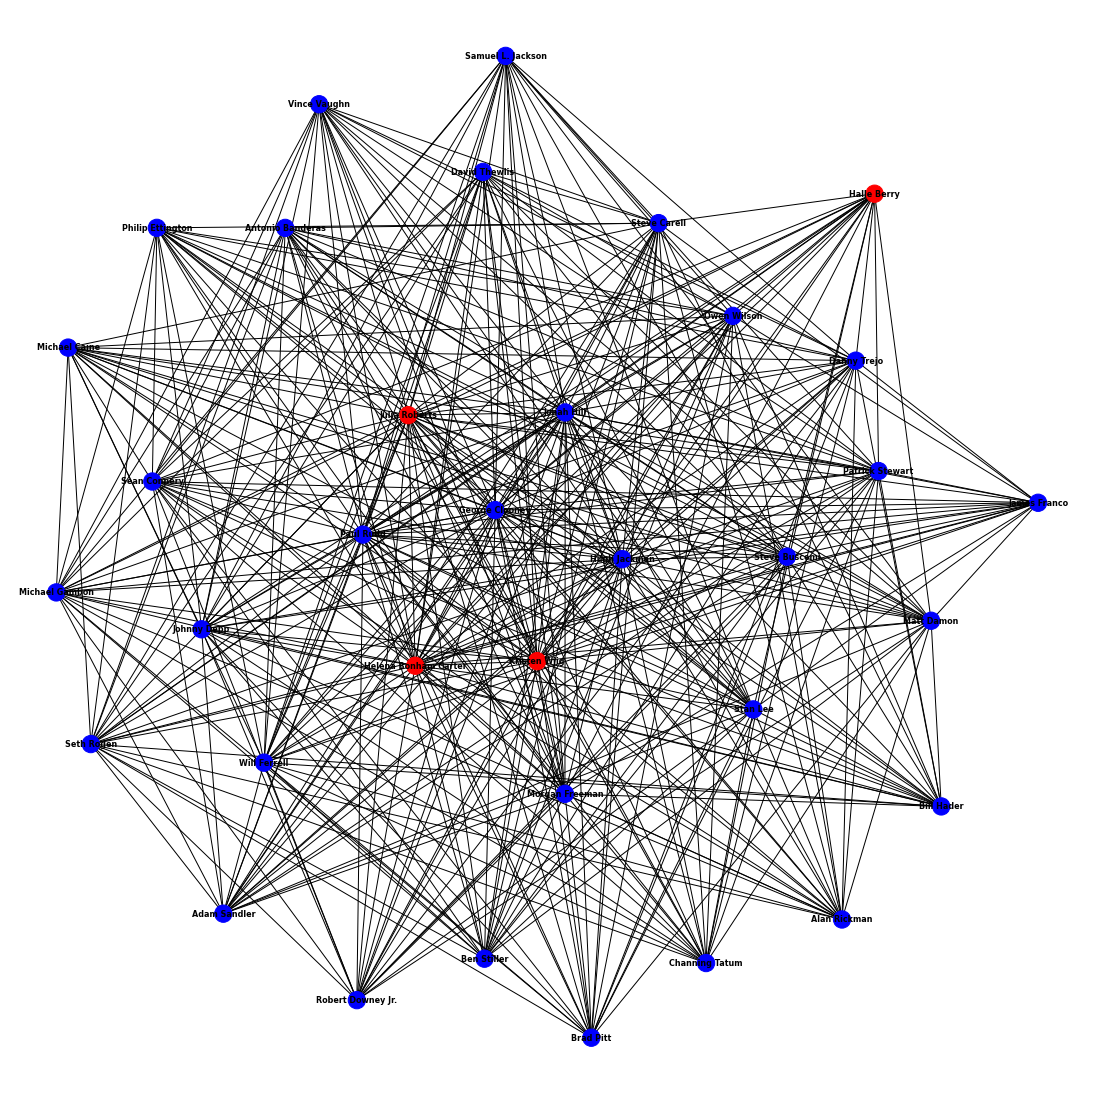

In [48]:
# define your color map for the nodes
color_map = []
for x in genders:
    if x==2.0:
        color_map.append('blue') # male actors
    else:
        color_map.append('red')  # female actors
        
# degree = [G_symm_dup.degree(i) for i in G_symm_dup.nodes()]
# could use this to set node size but it doesnt do much. 

plt.figure(figsize=(15, 15))
nx.draw(G_symm_dup, font_size= 8, font_weight='bold',node_color=color_map, with_labels=True)
plt.show()

In [49]:
nx.degree_centrality(G_symm_dup)
degree_centrality_top = pd.DataFrame.from_dict(nx.degree_centrality(G_symm_dup), orient='index')

degree_centrality_top.rename(columns={'0': 'Network_Centrality'})

{'Michael Caine': 0.5882352941176471,
 'Morgan Freeman': 0.6470588235294118,
 'Seth Rogen': 0.6470588235294118,
 'Matt Damon': 0.6470588235294118,
 'Helena Bonham Carter': 1.0588235294117647,
 'Owen Wilson': 0.6470588235294118,
 'Paul Rudd': 1.0588235294117647,
 'Will Ferrell': 0.6470588235294118,
 'Jonah Hill': 1.0588235294117647,
 'Julia Roberts': 1.0588235294117647,
 'Kristen Wiig': 1.0588235294117647,
 'Steve Buscemi': 0.6470588235294118,
 'Stan Lee': 0.6470588235294118,
 'George Clooney': 1.0588235294117647,
 'Sean Connery': 0.6470588235294118,
 'Michael Gambon': 0.6470588235294118,
 'Steve Carell': 0.6470588235294118,
 'Johnny Depp': 0.6470588235294118,
 'Danny Trejo': 0.6470588235294118,
 'Patrick Stewart': 0.6470588235294118,
 'Hugh Jackman': 1.0588235294117647,
 'Brad Pitt': 0.5882352941176471,
 'Alan Rickman': 0.5882352941176471,
 'Bill Hader': 0.5882352941176471,
 'James Franco': 0.5882352941176471,
 'Ben Stiller': 0.5882352941176471,
 'Vince Vaughn': 0.5882352941176471,
 'C

In [185]:
# get edge attributes and change color of edges to make lighter
# G_symm_dup.edges()

### Make an Adjacency Matrix:

In [184]:
# try to turn SciPy sparse matrix to NumPy matrix:

A = nx.adjacency_matrix(G_symm_dup).todense()
adj_matrix = pd.DataFrame(A)

In [183]:
# rename the rows and columns to the names in G_symm_dup.nodes()

nodes = [i for i in G_symm_dup.nodes()]

adj_matrix.columns = [i for i in nodes]
adj_matrix.set_axis([i for i in nodes], axis=0, inplace=True)
adj_matrix

,Philip Ettington,Sean Connery,Seth Rogen,Kristen Wiig,Hugh Jackman,Matt Damon,Johnny Depp,Morgan Freeman,Stan Lee,Jonah Hill,...,Channing Tatum,Brad Pitt,Samuel L. Jackson,Adam Sandler,Alan Rickman,James Franco,Ben Stiller,David Thewlis,Antonio Banderas,Vince Vaughn
Philip Ettington,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Sean Connery,1,0,0,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
Seth Rogen,1,0,0,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
Kristen Wiig,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Hugh Jackman,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Matt Damon,1,0,0,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
Johnny Depp,1,0,0,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
Morgan Freeman,1,0,0,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
Stan Lee,1,0,0,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
Jonah Hill,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
